Notebook by Reint Fischer (r.p.b.fischer@students.uu.nl)

For a good tutorial on the general use of matplotlib, don't forget to look at last year's PFL notebooks 7 and 8 by Anne, Leo and Mikael.

![Airtemps.png](Airtemps.png)

# Using color in visualizing ocean and atmosphere data

## Introduction to colors, visualization

In meteorology and oceanography we often try to understand processes that are hard to see with the naked eye. In order to find patterns and explore the (model)data we have collected, we almost always use artificial colors. In this notebook we are going to explore what options we have in **matplotlib** to use color correctly and creatively.

To create effective figures, it is paramount to realise what your data are and what your question is: In research, we formulate some sort of **question**, gather **data** and try to find what **story** we can tell or what answers we can give by interpreting the data. A good **visualization** helps us and our audience in the correct interpretation of the patterns and distributions in the data.

The spark for this talk is the ongoing online anger in the form of ranting blogposts on the internet directed against scientists using the **'jet'** or **'rainbow'** colormap. So, why are people claiming it misrepresents the data?

Drew Skau lays out the whole problem in a very nice blog at Visually (https://visual.ly/blog/rainbow-color-scales/). I have adapted his explanation slightly and added some concepts from another nice series by Robert Simmon from NASA (https://earthobservatory.nasa.gov/blogs/elegantfigures/2013/08/05/subtleties-of-color-part-1-of-6/):

- **"Divisions between hues create edges in the visualization"**
<br>
Jet uses the most diverse range of colors or hues possible to make it easier to differentiate between different colors. However, because not all colors are perceived the same through human eyes, we may see discrete edges where there is a continuum. These figures by Jake Vanderplas show how especially cyan and yellow can be perceived as banded colors. As seen in the grayscale version of the colormap, the brightness of the colors show a complex pattern that may change the way we see the data distributed. This also makes it impossible to assess when printed in black and white.

![jakevdp_jet.jpg](jakevdp_jet.jpg)

![jet_grayscale.png](jet_grayscale.png)
Source: https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/
<br>
- **"Yellow is special"**
<br>

![cone_sensitivity.png](cone_sensitivity.png)
Source: https://en.wikipedia.org/wiki/File:Cone-response.svg
<br>
- **"The spectral order of hues has no inherent meaning"**
<br>

![spectralorder.png](spectralorder.png)
Source: https://visual.ly/blog/rainbow-color-scales/
- **"Detail is actually harder to see in a rainbow"**
<br>
If we look at subplot A of the figure showing the air temperature, we see that details, especially in the cyan/green/yellow regions (for example in Siberia) are very hard to see. This is because the brightness of these colours is very similar and humans can distinguish shades of black and white better than it can different hues. This is because we have way more rods than cones and the cones do not absorb a single frequency.
<br>

![RainbowVsGray.png](RainbowVsGray.png)
Source: https://visual.ly/blog/rainbow-color-scales/
<br>
- **"Colorblind people cannot use them."**
<br>

![colorblind.png](colorblind.png)
Source: https://visual.ly/blog/rainbow-color-scales/

## Data types and colormaps

Okay, so now it is clear why the 'rainbow' colormaps are not ideal. But what kind of different options do we have? Cynthia Brewer has an entire website devoted to this (http://www.personal.psu.edu/cab38/ColorSch/SchHome.html). There are three main different types of colormaps, each suitable for different types of data:
<br>

- **Qualitative** -> different **hues** for different **nominal groups** 
<br>
- **Sequential** -> **quantitative** data represented by ordered/sequential **lightness steps**, multiple hues possible
<br> 
- **Diverging** -> essentially two sequential colormaps combined, very useful for **quantitative** data **diverging** from a **critical midpoint/median**


![data_types.png](data_types.png)
Source: http://www.personal.psu.edu/cab38/ColorSch/Schemes.html

You will also see this separation of different types of colormaps in matplotlib. Take a good look at your data and decide what you think is suitable. What do you think is the most suitable type of colormap for air temperature?
<br>
**A**: Qualitative
<br>
**B**: Sequential
<br>
**C**: Diverging

Now let's return to criticism that the rainbow colormap is bad at separating details. The conclusion was that differences over very **small distances** are better seen with varying brightness than varying hue. However, comparing differences over **longer distances** is actually harder with monotonic colormaps that change in brightness. This is caused by a phenomenon known as simultaneous contrast. The same shade of gray looks lighter surrounded by a dark background and darker surrounded by a light background. This makes it hard to compare purely sequential colormaps over longer distances. To help tackle this, you can use **sequential** colormaps with **multiple hues** such as in subplot **C** for the air temperature data.

![simultaneous_contrast.png](simultaneous_contrast.png)
Source: http://ccom.unh.edu/sites/default/files/publications/Ware_1988_CGA_Color_sequences_univariate_maps.pdf

## Using packages and functions to customize your colors

When mapping data, matplotlib has several options that handle colormaps and colors very differently, e.g. **imshow**, **contourf** and **pcolormesh**. I think contourf is the most straightforward to use, but I prefer pcolormesh because it tends to show the data at the correct resolution. Here, we will therefore focus on **pcolormesh**.

As covered in the earlier PFL sessions on matplotlib, there are several ways to access matplotlib objects, which is no different for colormaps. Most of the basic options are covered in `matplotlib.pyplot`. Also we are going to look at the cmocean package (https://matplotlib.org/cmocean/), which has beautiful and perceptually uniform colormaps that are tailored for different types of oceanographic data.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cmocean

Matplotlib colormap objects are used to map a scalar dataset to a colorscheme. There are different ways to do this, but the standard matplotlib colormaps contains a discrete number of RGBA colours onto which the data is mapped by a matplotlib normalization function. There are many colormaps available. To see which ones are available, go to https://matplotlib.org/tutorials/colors/colormaps.html. We can show all options by calling `plt.colormaps()`.

In [3]:
plt.colormaps()

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cmo.algae',
 'cmo.alga

We are going to choose the perceptually uniform **sequential** colormap called `'magma'`. The names can be used directly inside plotting functions such as `plt.contourf`, `plt.pcolormesh` or `plt.scatter` with the keyword `cmap`. If we want more control over the colormap object, we can also create it beforehand by using `plt.get_cmap`. Since the standard colormaps return a discrete number of colours, we can specify this number with the second argument.

In [4]:
my_cmap = plt.get_cmap('magma',10)
print(my_cmap)

In [5]:
print(my_cmap.colors)                       # Show all RGBA colors in my_cmap

[[1.46200e-03 4.66000e-04 1.38660e-02 1.00000e+00]
 [9.29490e-02 5.99040e-02 2.39164e-01 1.00000e+00]
 [2.65447e-01 6.02370e-02 4.61840e-01 1.00000e+00]
 [4.45163e-01 1.22724e-01 5.06901e-01 1.00000e+00]
 [6.20005e-01 1.83840e-01 4.97524e-01 1.00000e+00]
 [8.04752e-01 2.49911e-01 4.42102e-01 1.00000e+00]
 [9.44006e-01 3.77643e-01 3.65136e-01 1.00000e+00]
 [9.92196e-01 5.87502e-01 4.06299e-01 1.00000e+00]
 [9.96369e-01 7.91167e-01 5.53499e-01 1.00000e+00]
 [9.87053e-01 9.91438e-01 7.49504e-01 1.00000e+00]]


In [6]:
print('my_cmap color 0 = '+str(my_cmap(0))) # Individual colors are callable

my_cmap color 0 = (0.001462, 0.000466, 0.013866, 1.0)


A colormap maps scalar data onto different colors. To see how it does this we are going to look at how a dataset with values between 0 and 100 are mapped onto the ten colors.

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]


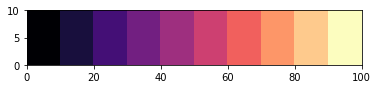

In [7]:
im = np.outer(np.ones(10), np.arange(100))  # Create a grid with data from 0 to 99 homogeneous in the vertical
print(im[0])

fig = plt.figure(figsize=(6, 1))
ax = fig.add_subplot(111)
ax.pcolormesh(im,cmap=my_cmap)              # I prefer to use pcolormesh over contourf. Here you can also directly call the colormap with cmap='magma'
plt.show()

Now we are going to look at the default setting of the colormap.

The number of colors by default = 256


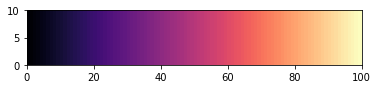

In [8]:
my_cmap = plt.get_cmap('magma')

print('The number of colors by default = '+str(len(my_cmap.colors)))


im = np.outer(np.ones(10), np.arange(100))

fig = plt.figure(figsize=(6, 1))
ax = fig.add_subplot(111)
ax.pcolormesh(im,cmap=my_cmap)
plt.show()

If we want to **reverse** the colormap, simply add `'_r'` to the name:

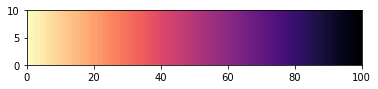

In [9]:
my_cmap = plt.get_cmap('magma_r',256)


im = np.outer(np.ones(10), np.arange(100))

fig = plt.figure(figsize=(6, 1))
ax = fig.add_subplot(111)
ax.pcolormesh(im,cmap=my_cmap)
plt.show()

The cmocean package contains additional colormaps and some user-friendly tools. The colormaps are also registered in the standard matplotlib library, identifiable by the `cmo.` prefix

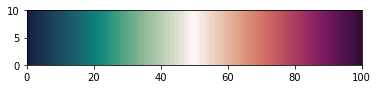

In [10]:
my_cmap = plt.get_cmap('cmo.curl')
im = np.outer(np.ones(10), np.arange(100))  # Create a grid with data from 0 to 99 homogeneous in the vertical

fig = plt.figure(figsize=(6, 1))
ax = fig.add_subplot(111)
ax.pcolormesh(im,cmap=my_cmap)              # I prefer to use pcolormesh over contourf
plt.show()

The tool `crop_by_percent` clips your colormap so that darker colors that may be hard to differentiate between when close together are taken out.

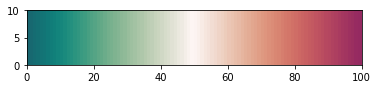

In [11]:
newcmap = cmocean.tools.crop_by_percent(my_cmap, 30, which='both', N=None)

im = np.outer(np.ones(10), np.arange(100))  # Create a grid with data from 0 to 99 homogeneous in the vertical

fig = plt.figure(figsize=(6, 1))
ax = fig.add_subplot(111)
ax.pcolormesh(im,cmap=newcmap)              # I prefer to use pcolormesh over contourf
plt.show()

Now let's see how the figure from the start of the presentation is created. The dataset used is from the **xarray** tutorials. It contains air temperature data over the Arctic. 

In [12]:
ds = xr.tutorial.load_dataset('rasm')
ds

<xarray.Dataset>
Dimensions:  (time: 36, x: 275, y: 205)
Coordinates:
  * time     (time) object 1980-09-16 12:00:00 ... 1983-08-17 00:00:00
    xc       (y, x) float64 189.2 189.4 189.6 189.7 ... 17.65 17.4 17.15 16.91
    yc       (y, x) float64 16.53 16.78 17.02 17.27 ... 28.26 28.01 27.76 27.51
Dimensions without coordinates: x, y
Data variables:
    Tair     (time, y, x) float64 nan nan nan nan nan ... 29.8 28.66 28.19 28.21
Attributes:
    title:                     /workspace/jhamman/processed/R1002RBRxaaa01a/l...
    institution:               U.W.
    source:                    RACM R1002RBRxaaa01a
    output_frequency:          daily
    output_mode:               averaged
    convention:                CF-1.4
    references:                Based on the initial model of Liang et al., 19...
    comment:                   Output from the Variable Infiltration Capacity...
    nco_openmp_thread_number:  1
    NCO:                       "4.6.0"
    history:                   Tue D

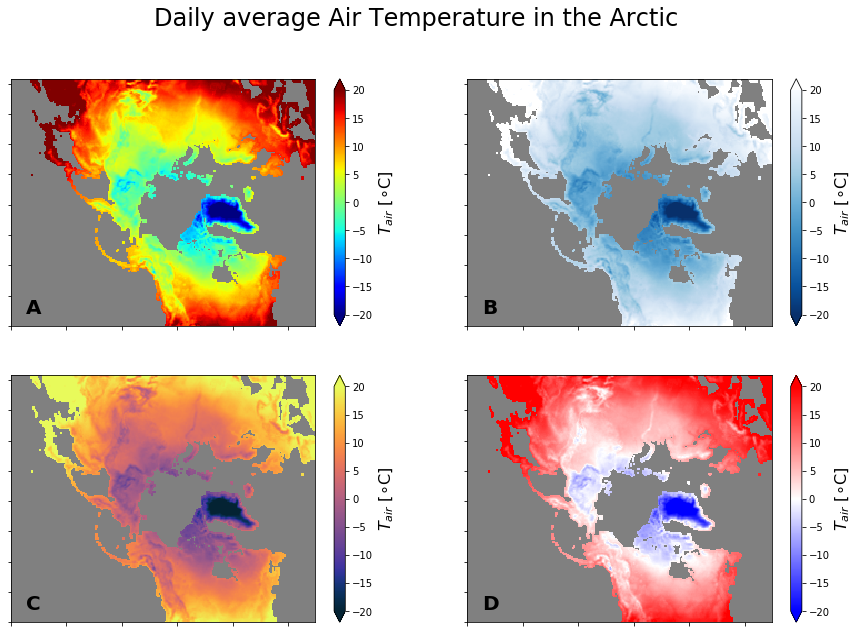

In [14]:
### Defining figure and subplots ###
fig = plt.figure(figsize=(15,10))
fig.suptitle('Daily average Air Temperature in the Arctic', fontsize=24)

ax1 = fig.add_subplot(221)
ax1.get_yaxis().set_ticklabels([])
ax1.get_xaxis().set_ticklabels([])
ax1.text(0.05,0.05,'A',transform=ax1.transAxes, fontsize=20,weight='bold')


### Interesting settings for plot A ###                                       
ax1.set_facecolor('gray')                             # Defining a suitable facecolor can be very relevant for the effect of your colormap

cmap1 = plt.get_cmap('jet')                           # The 'despised' jet colormap with 256 colors

pcm1 = ax1.pcolormesh(ds.x,ds.y,ds.Tair.isel(time=0)  # define the grid and the 2D data to be plotted
                    ,cmap=cmap1                       # Use the jet colormap
                    , vmin=-20, vmax=20)              # Set the upper and lower bound of data mapped onto the colormap
cbar1 = fig.colorbar(pcm1,extend='both')              # By default the colormap colors values above and under the bounds with the last color and pcolormesh shows these values. Show this in the colorbar with extend = 'both'
cbar1.set_label('$T_{air}$ [$\circ$C]',size=16)

### Defining subplot B ###
ax2 = fig.add_subplot(222)
ax2.get_yaxis().set_ticklabels([])
ax2.get_xaxis().set_ticklabels([])
ax2.text(0.05,0.05,'B',transform=ax2.transAxes, fontsize=20,weight='bold')


### Interesting settings for plot B ###
ax2.set_facecolor('gray')

cmap2 = plt.get_cmap('Blues_r')                       # Reverse the 'Blues' colormap
cmap2.set_over('w')                                   # Add the color white for values above the bounds in pcolormesh

pcm2 = ax2.pcolormesh(ds.x,ds.y,ds.Tair.isel(time=0)
                    ,cmap=cmap2
                   , vmin=-20, vmax=20)
cbar2 = fig.colorbar(pcm2,extend='both')
cbar2.set_label('$T_{air}$ [$\circ$C]',size=16)

### Defining subplot C ###
ax3 = fig.add_subplot(223)
ax3.get_yaxis().set_ticklabels([])
ax3.get_xaxis().set_ticklabels([])
ax3.text(0.05,0.05,'C',transform=ax3.transAxes, fontsize=20,weight='bold')


### Interesting settings for plot C ###
ax3.set_facecolor('gray')

cmap3 = plt.get_cmap('cmo.thermal')                    # Use the cmocean package

pcm3 = ax3.pcolormesh(ds.x,ds.y,ds.Tair.isel(time=0)
                    ,cmap=cmap3
                   , vmin=-20, vmax=20)               
cbar3 = fig.colorbar(pcm3,extend='both')               # Now there are no values below the lower bound, so only the positive side of the colorbar is extended with extend = 'max'
cbar3.set_label('$T_{air}$ [$\circ$C]',size=16)

### Defining subplot D ###
ax4 = fig.add_subplot(224)
ax4.get_yaxis().set_ticklabels([])
ax4.get_xaxis().set_ticklabels([])
ax4.text(0.05,0.05,'D',transform=ax4.transAxes, fontsize=20,weight='bold')


### Interesting settings for plot C ###
ax4.set_facecolor('gray')

cmap4 = plt.get_cmap('bwr')                          # Use a diverging colormap

pcm4 = ax4.pcolormesh(ds.x,ds.y,ds.Tair.isel(time=0)
                    ,cmap=cmap4
                   , vmin=-20, vmax=20)
cbar4 = fig.colorbar(pcm4,extend='both')
cbar4.set_label('$T_{air}$ [$\circ$C]',size=16)

plt.savefig('Airtemps')

Here, let's look at some more alternatives

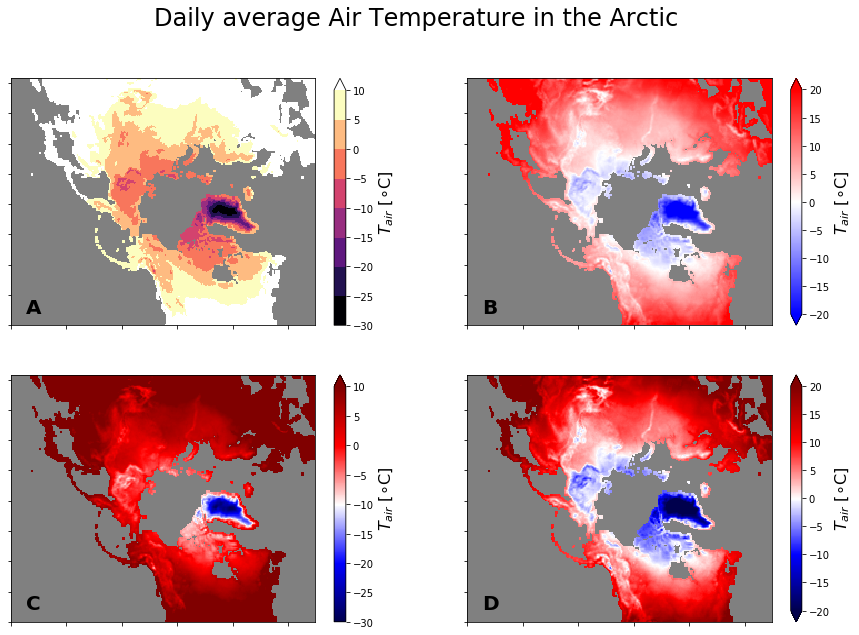

In [25]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Daily average Air Temperature in the Arctic', fontsize=24)

ax1 = fig.add_subplot(221)
ax1.get_yaxis().set_ticklabels([])
ax1.get_xaxis().set_ticklabels([])
ax1.set_facecolor('gray')
ax1.text(0.05,0.05,'A',transform=ax1.transAxes, fontsize=20,weight='bold')


cmap1 = plt.get_cmap('magma',8)
cmap1.set_over('w')

pcm1 = ax1.pcolormesh(ds.x,ds.y,ds.Tair.isel(time=0)
                    ,cmap=cmap1
                   , vmin=-30, vmax=10)
cbar1 = fig.colorbar(pcm1,extend='max')
cbar1.set_label('$T_{air}$ [$\circ$C]',size=16)

ax2 = fig.add_subplot(222)
ax2.get_yaxis().set_ticklabels([])
ax2.get_xaxis().set_ticklabels([])
ax2.set_facecolor('gray')
ax2.text(0.05,0.05,'B',transform=ax2.transAxes, fontsize=20,weight='bold')


cmap2 = plt.get_cmap('bwr')

pcm2 = ax2.pcolormesh(ds.x,ds.y,ds.Tair.isel(time=0)
                    ,cmap=cmap2
                   , vmin=-20, vmax=20)
cbar2 = fig.colorbar(pcm2,extend='both')
cbar2.set_label('$T_{air}$ [$\circ$C]',size=16)

ax3 = fig.add_subplot(223)
ax3.get_yaxis().set_ticklabels([])
ax3.get_xaxis().set_ticklabels([])
ax3.set_facecolor('gray')
ax3.text(0.05,0.05,'C',transform=ax3.transAxes, fontsize=20,weight='bold')


cmap3 = plt.get_cmap('seismic')

pcm3 = ax3.pcolormesh(ds.x,ds.y,ds.Tair.isel(time=0)
                    ,cmap=cmap3
                   , vmin=-30, vmax=10)
cbar3 = fig.colorbar(pcm3,extend='max')
cbar3.set_label('$T_{air}$ [$\circ$C]',size=16)

ax4 = fig.add_subplot(224)
ax4.get_yaxis().set_ticklabels([])
ax4.get_xaxis().set_ticklabels([])
ax4.set_facecolor('gray')
ax4.text(0.05,0.05,'D',transform=ax4.transAxes, fontsize=20,weight='bold')


cmap4 = plt.get_cmap('seismic')

pcm4 = ax4.pcolormesh(ds.x,ds.y,ds.Tair.isel(time=0)
                    ,cmap=cmap4
                   , vmin=-20, vmax=20)
cbar4 = fig.colorbar(pcm4,extend='both')
cbar4.set_label('$T_{air}$ [$\circ$C]',size=16)

plt.savefig('AirtempsAlt')

The next step could be to change the seismic colormap itself, so the blues span a larger range, showing more detail in Greenland.

### Exercise
To finish up, an exercise for those who want some practice: I have made a map using the methods we've treated. You can try to recreate it by changing the colormap and pcolormesh in the code below. Tips: look at the colorbar and check the cmocean page!

![Exercise.png](Exercise.png)

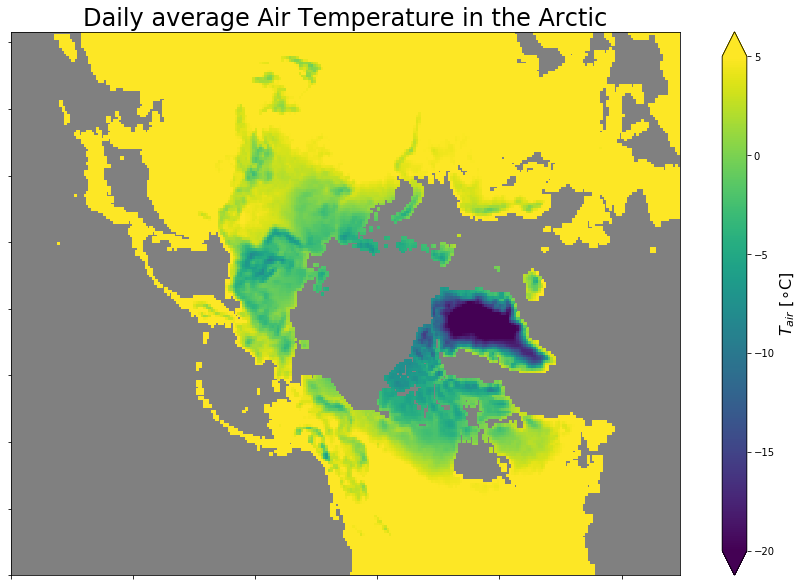

In [26]:
### leave these unchanged ###
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.set_title('Daily average Air Temperature in the Arctic',fontsize=24)
ax.get_yaxis().set_ticklabels([])
ax.get_xaxis().set_ticklabels([])
ax.set_facecolor('gray')


### CHANGE THINGS HERE ###

cmap = plt.get_cmap('viridis')

pcm = ax.pcolormesh(ds.x,ds.y,ds.Tair.isel(time=0)
                    ,cmap=cmap
                   , vmin=-20, vmax=5)


### leave these unchanged ###
cbar = fig.colorbar(pcm,extend='both')
cbar.set_label('$T_{air}$ [$\circ$C]',size=16)

### Good luck making beautiful and accurate figures in your theses, your papers, for yourself and for your audience!

For more information check out these pages:

- On Matplotlib colormaps
https://matplotlib.org/api/_as_gen/matplotlib.colors.ListedColormap.html https://matplotlib.org/api/_as_gen/matplotlib.colors.LinearSegmentedColormap.html https://matplotlib.org/api/_as_gen/matplotlib.colors.Normalize.html#matplotlib.colors.Normalize https://matplotlib.org/api/cm_api.html#matplotlib.cm.ScalarMappable